## Imports

In [60]:
import pandas as pd
import numpy as np
import functions.visualization_functions as VisualizationFunctions

import warnings
warnings.filterwarnings('ignore')

## Dataset

[link](https://www.kaggle.com/datasets/shilongzhuang/telecom-customer-churn-by-maven-analytics)

In [61]:
data_path = 'datasets/telecom_customer_churn.csv'
df_churn = pd.read_csv(data_path)

In [62]:
df_churn.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [63]:
print(df_churn.columns.tolist())

['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason']


In [64]:
df_churn.shape

(7043, 38)

## Filtrando Dataset

In [65]:
drop_columns = ['Customer ID', 'City', 'Zip Code', 'Latitude', 'Longitude','Churn Category', 'Churn Reason']
df_churn = df_churn.drop(columns=drop_columns)
df_churn.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,NaN,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed
1,Male,46,No,0,0,9,NaN,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned
4,Female,75,Yes,0,3,3,NaN,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned


In [66]:
df_churn[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Joined              454
Name: count, dtype: int64

In [67]:
df_churn = df_churn.drop(df_churn[df_churn['Customer Status']=='Joined'].index)

In [68]:
df_churn[['Customer Status']].value_counts()

Customer Status
Stayed             4720
Churned            1869
Name: count, dtype: int64

In [69]:
colunas_com_nans = df_churn.columns[df_churn.isnull().any()].tolist()

print("Colunas com valores NaN:", colunas_com_nans)

Colunas com valores NaN: ['Offer', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']


In [70]:
df_churn.loc[pd.isnull(df_churn['Internet Type']), colunas_com_nans]

,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
20,NaN,31.43,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,Offer E,12.43,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
27,NaN,19.70,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,Offer C,37.70,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,NaN,38.39,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7024,NaN,32.03,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7026,Offer E,31.02,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7028,Offer A,48.75,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7032,NaN,7.67,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [71]:
num_columns = ['Avg Monthly Long Distance Charges', 'Avg Monthly GB Download']

for column in num_columns:
    df_churn[column] = df_churn[column].fillna(df_churn[column].mean())


In [72]:
df_churn['Offer'] = df_churn['Offer'].fillna('No Offer')

In [73]:
cat_columns = ['Multiple Lines', 'Internet Type', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data']

for column in cat_columns:
    probs = df_churn[column].value_counts(normalize=True)

    df_churn[column] = df_churn[column].apply(
        lambda x: np.random.choice(probs.index, p=probs.values) if pd.isnull(x) else x
    )

In [74]:
df_churn[colunas_com_nans]

,Offer,Avg Monthly Long Distance Charges,Multiple Lines,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data
0,No Offer,42.390000,No,Cable,16.000000,No,Yes,No,Yes,Yes,No,No,Yes
1,No Offer,10.690000,Yes,Cable,10.000000,No,No,No,No,No,Yes,Yes,No
2,Offer E,33.650000,No,Fiber Optic,30.000000,No,No,Yes,No,No,No,No,Yes
3,Offer D,27.820000,No,Fiber Optic,4.000000,No,Yes,Yes,No,Yes,Yes,No,Yes
4,No Offer,7.380000,No,Fiber Optic,11.000000,No,No,No,Yes,Yes,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7037,No Offer,2.010000,No,Fiber Optic,26.225929,No,No,Yes,Yes,Yes,No,No,Yes
7038,Offer D,46.680000,No,DSL,59.000000,Yes,No,No,Yes,No,No,Yes,Yes
7039,Offer D,16.200000,Yes,Fiber Optic,17.000000,No,No,No,No,No,Yes,Yes,Yes
7041,Offer A,2.120000,No,Cable,58.000000,Yes,No,Yes,Yes,No,Yes,Yes,Yes


In [75]:
colunas_com_nans = df_churn.columns[df_churn.isnull().any()].tolist()

print("Colunas com valores NaN:", colunas_com_nans)

Colunas com valores NaN: []


In [76]:
status_mapping = {'Stayed': 0, 'Churned': 1}
df_churn['Customer Status'] = df_churn['Customer Status'].map(status_mapping)

In [77]:
df_churn.head()

,Gender,Age,Married,Number of Dependents,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,...,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status
0,Female,37,Yes,0,2,9,No Offer,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,0,9,No Offer,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3,3,No Offer,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [78]:
print(df_churn.columns.tolist())

['Gender', 'Age', 'Married', 'Number of Dependents', 'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges', 'Multiple Lines', 'Internet Service', 'Internet Type', 'Avg Monthly GB Download', 'Online Security', 'Online Backup', 'Device Protection Plan', 'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Customer Status']


In [79]:
def format_column_names(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('number', 'n').str.replace('total', 'ttl').str.replace('long', 'l').str.replace('charges', 'chg')
    return df

In [80]:
df_churn = format_column_names(df_churn)

In [81]:
print(df_churn.columns.tolist())

['gender', 'age', 'married', 'n_of_dependents', 'n_of_referrals', 'tenure_in_months', 'offer', 'phone_service', 'avg_monthly_l_distance_chg', 'multiple_lines', 'internet_service', 'internet_type', 'avg_monthly_gb_download', 'online_security', 'online_backup', 'device_protection_plan', 'premium_tech_support', 'streaming_tv', 'streaming_movies', 'streaming_music', 'unlimited_data', 'contract', 'paperless_billing', 'payment_method', 'monthly_charge', 'ttl_chg', 'ttl_refunds', 'ttl_extra_data_chg', 'ttl_l_distance_chg', 'ttl_revenue', 'customer_status']


In [82]:
for column in df_churn.columns.tolist():
    if len(str(column))>15:
        print(column)

tenure_in_months
avg_monthly_l_distance_chg
internet_service
avg_monthly_gb_download
device_protection_plan
premium_tech_support
streaming_movies
paperless_billing
ttl_extra_data_chg
ttl_l_distance_chg


In [83]:
df_churn.to_csv('datasets/churn_filtered.csv', index=False)

## Analisando Dataset

In [84]:
df_churn_filtered = pd.read_csv('datasets/churn_filtered.csv')

In [85]:
df_churn_filtered.head()

,gender,age,married,n_of_dependents,n_of_referrals,tenure_in_months,offer,phone_service,avg_monthly_l_distance_chg,multiple_lines,...,contract,paperless_billing,payment_method,monthly_charge,ttl_chg,ttl_refunds,ttl_extra_data_chg,ttl_l_distance_chg,ttl_revenue,customer_status
0,Female,37,Yes,0,2,9,No Offer,Yes,42.39,No,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,974.81,0
1,Male,46,No,0,0,9,No Offer,Yes,10.69,Yes,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,0
2,Male,50,No,0,0,4,Offer E,Yes,33.65,No,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1,13,Offer D,Yes,27.82,No,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3,3,No Offer,Yes,7.38,No,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,289.54,1


In [86]:
TARGET = "customer_status"
TARGET_LABEL = ["0 - Stayed", "1 - Churned"]

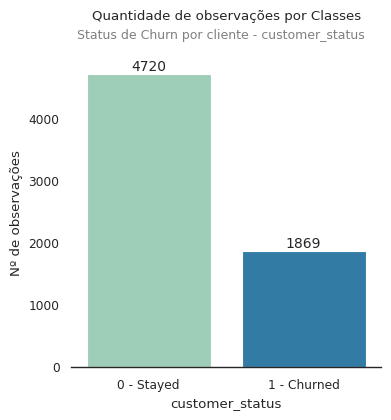

<Figure size 768x576 with 0 Axes>

In [87]:
VisualizationFunctions.qnt_obs_per_class(df_churn_filtered, 'Status de Churn por cliente', TARGET, TARGET_LABEL)

In [88]:
num_features = df_churn_filtered.select_dtypes(include=np.number).columns.tolist()
cat_features = df_churn_filtered.select_dtypes(exclude=np.number).columns.tolist()

num_features.remove(TARGET)

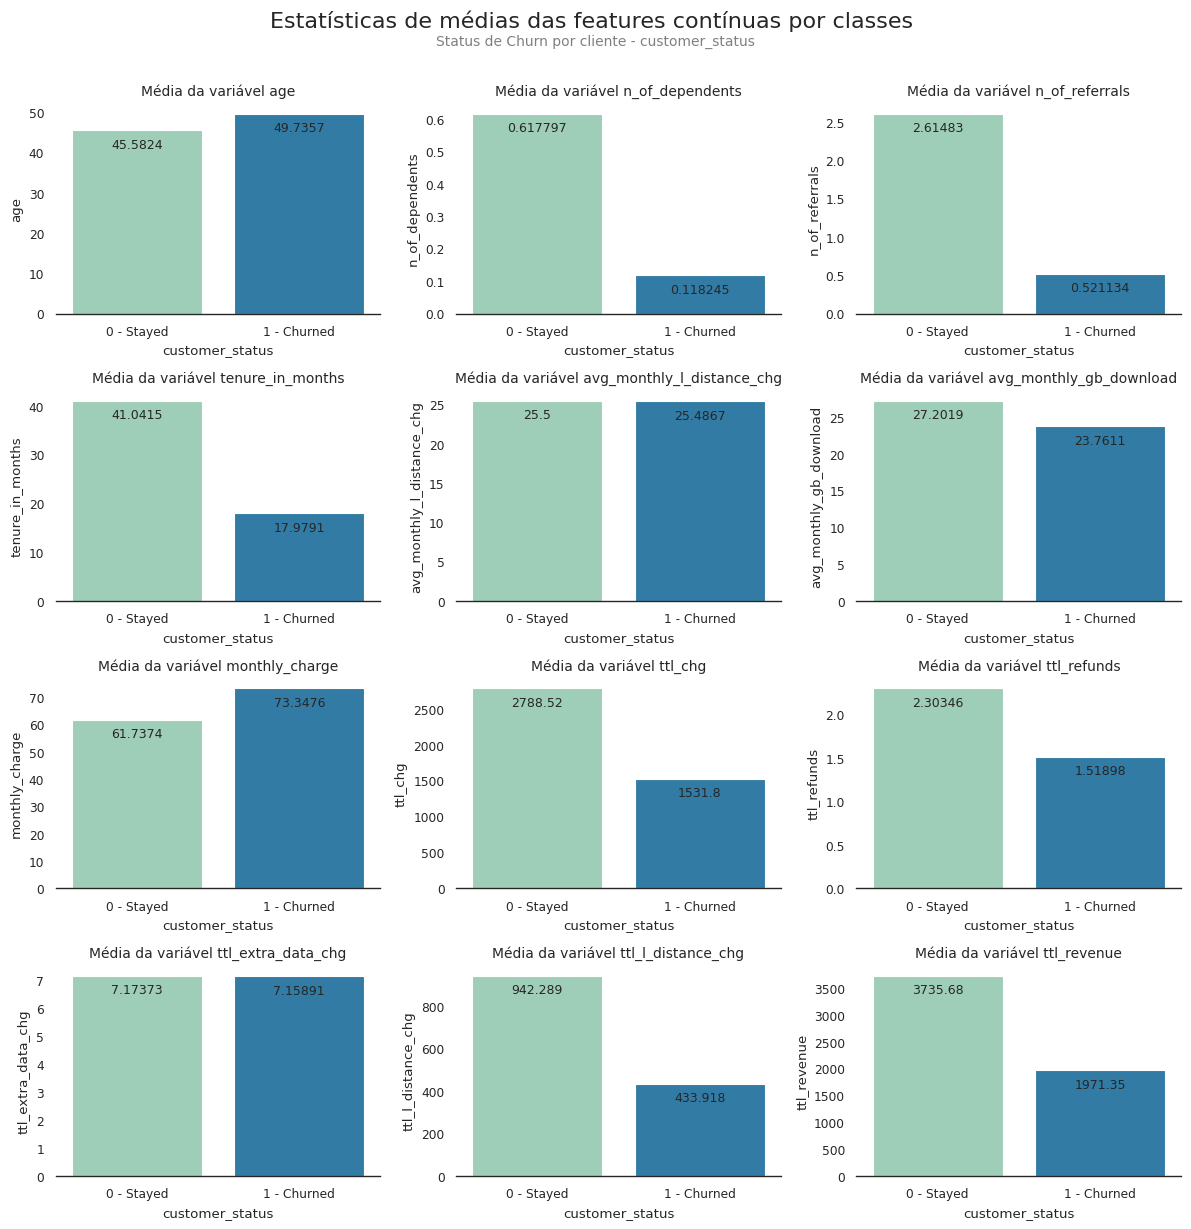

<Figure size 768x576 with 0 Axes>

In [89]:
VisualizationFunctions.cont_features_mean_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features, TARGET, TARGET_LABEL)

In [90]:
n = len(num_features)
part_size = n // 4

num_features_1 = num_features[:part_size]
num_features_2 = num_features[part_size:2*part_size]
num_features_3 = num_features[2*part_size:3*part_size]
num_features_4 = num_features[3*part_size:]

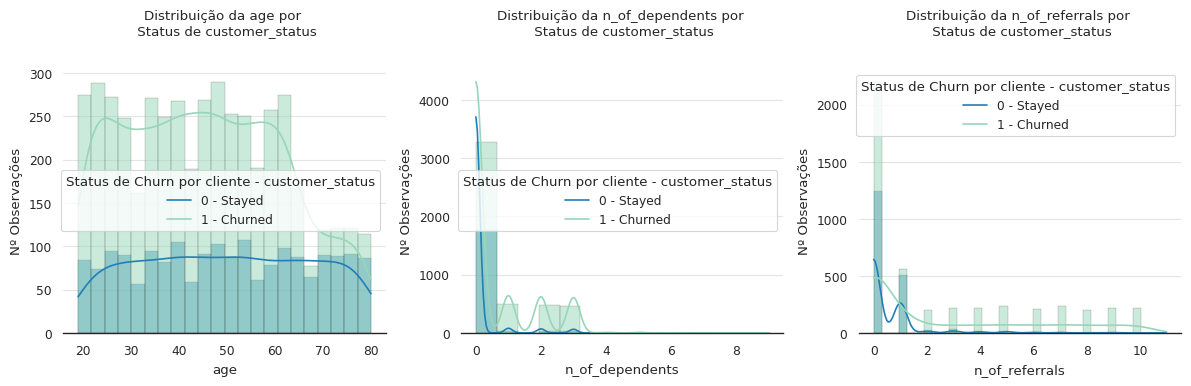

<Figure size 768x576 with 0 Axes>

In [91]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_1, TARGET, TARGET_LABEL)

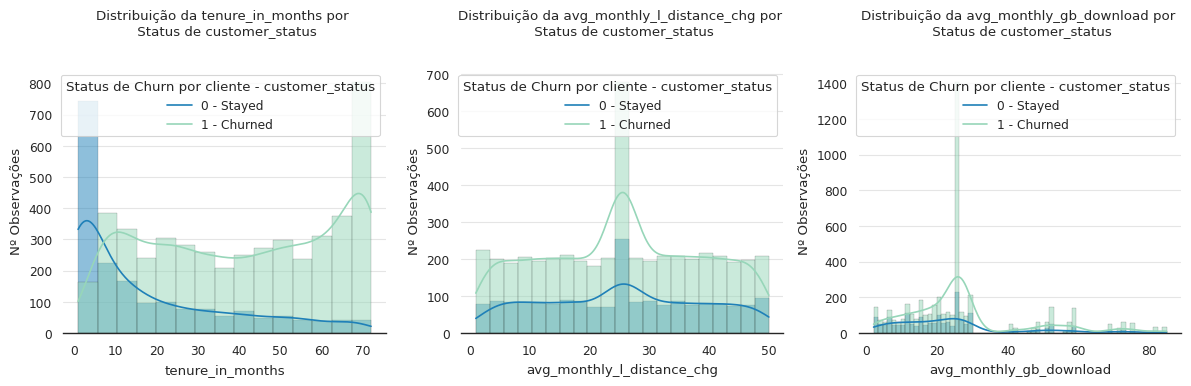

<Figure size 768x576 with 0 Axes>

In [92]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_2, TARGET, TARGET_LABEL)

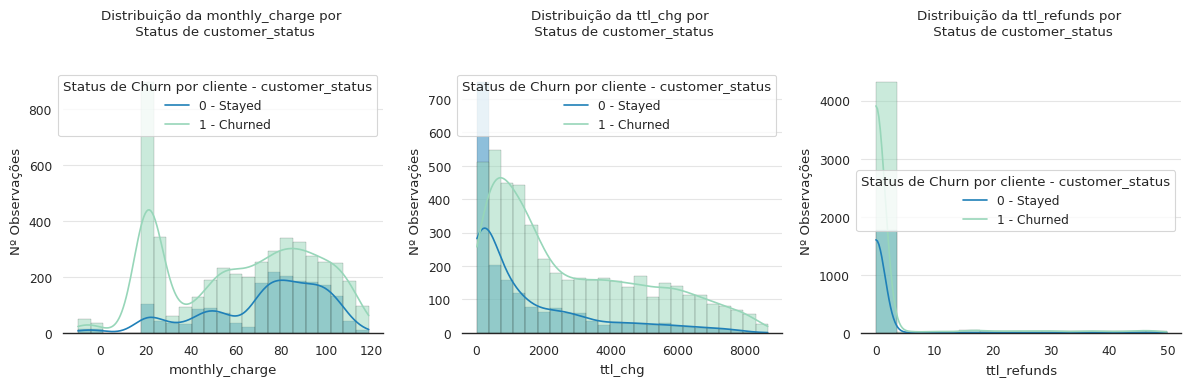

<Figure size 768x576 with 0 Axes>

In [93]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_3, TARGET, TARGET_LABEL)

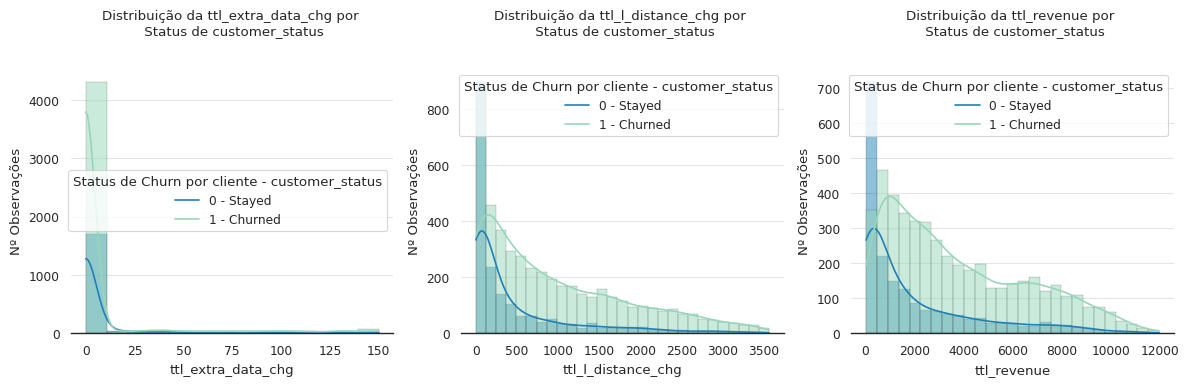

<Figure size 768x576 with 0 Axes>

In [94]:
VisualizationFunctions.dist_cont_per_target_class(df_churn_filtered, 'Status de Churn por cliente', num_features_4, TARGET, TARGET_LABEL)

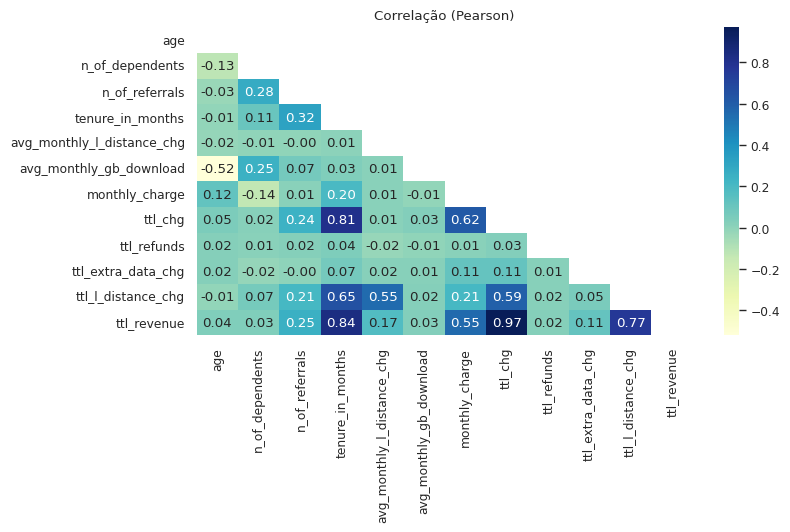

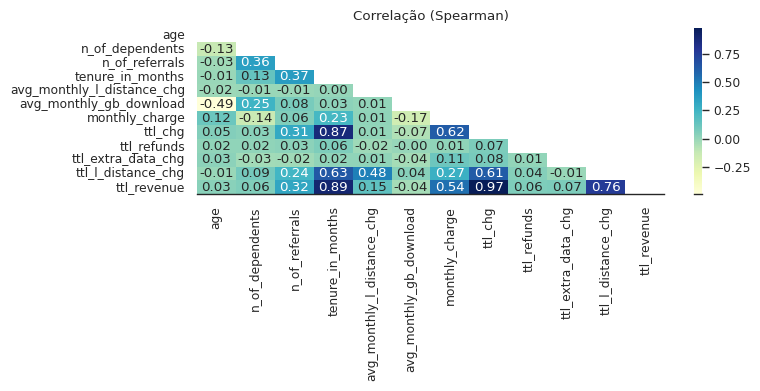

<Figure size 768x576 with 0 Axes>

In [95]:
VisualizationFunctions.correlation_plot(df_churn_filtered[num_features], ['pearson', 'spearman'])

### Features para considerar retirar

`monthly_charge` (por alta correlação com ttl_revenue e `ttl_chg`)  
`ttl_chg` (se `ttl_revenue` for mais representativa)  
`avg_monthly_l_distance_chg` (por correlação baixa com as outras variáveis)

In [96]:
drop_features = ['monthly_charge', 'ttl_chg', 'avg_monthly_l_distance_chg']

### Boxplot

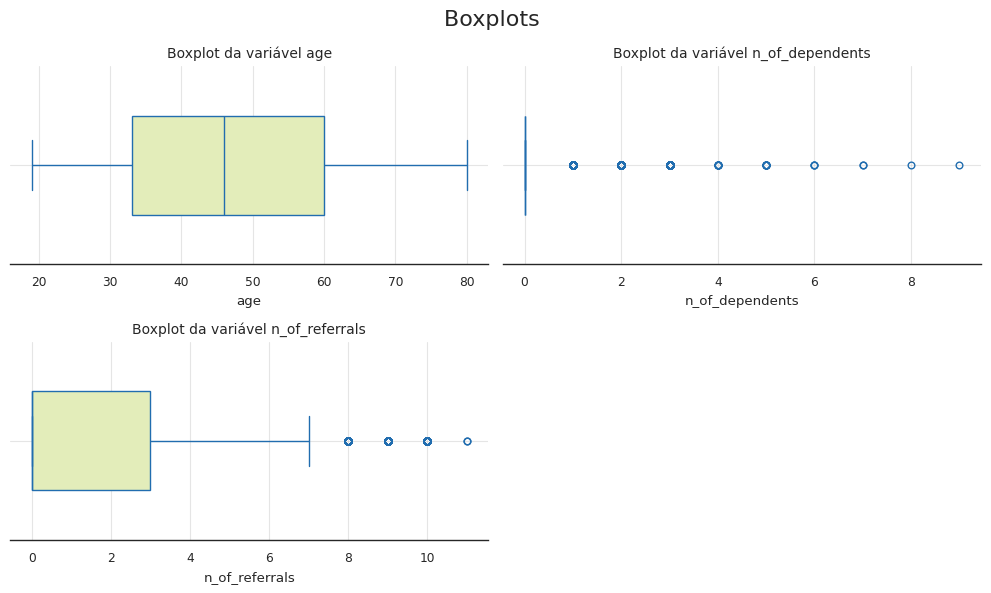

<Figure size 768x576 with 0 Axes>

In [97]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_1)

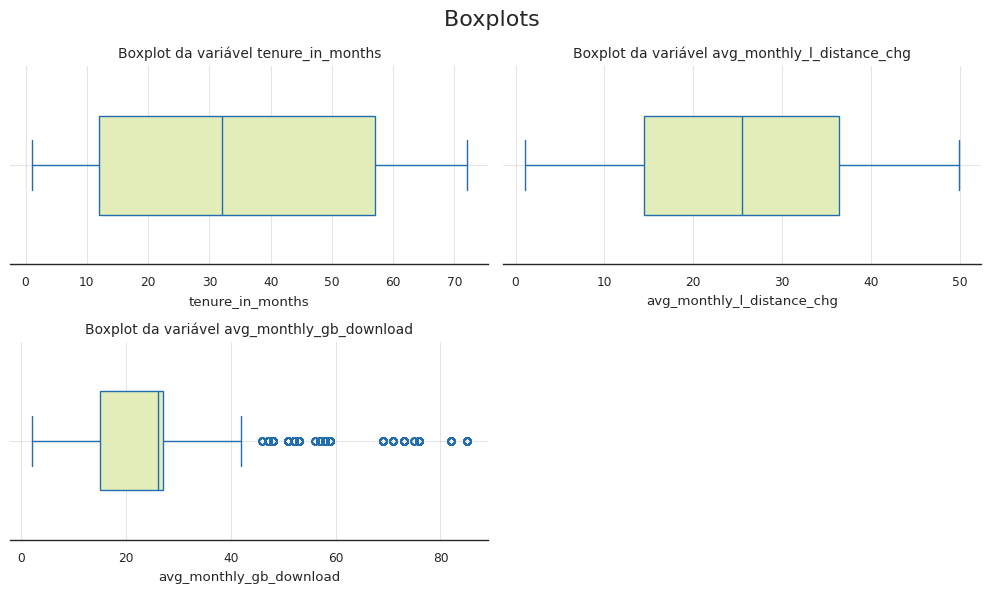

<Figure size 768x576 with 0 Axes>

In [98]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_2)

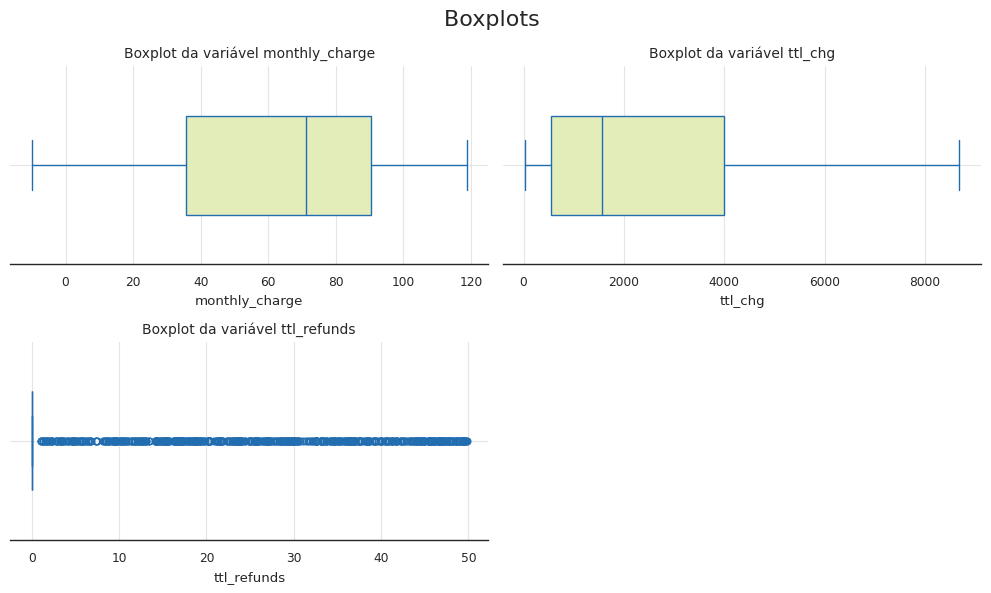

<Figure size 768x576 with 0 Axes>

In [99]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_3)

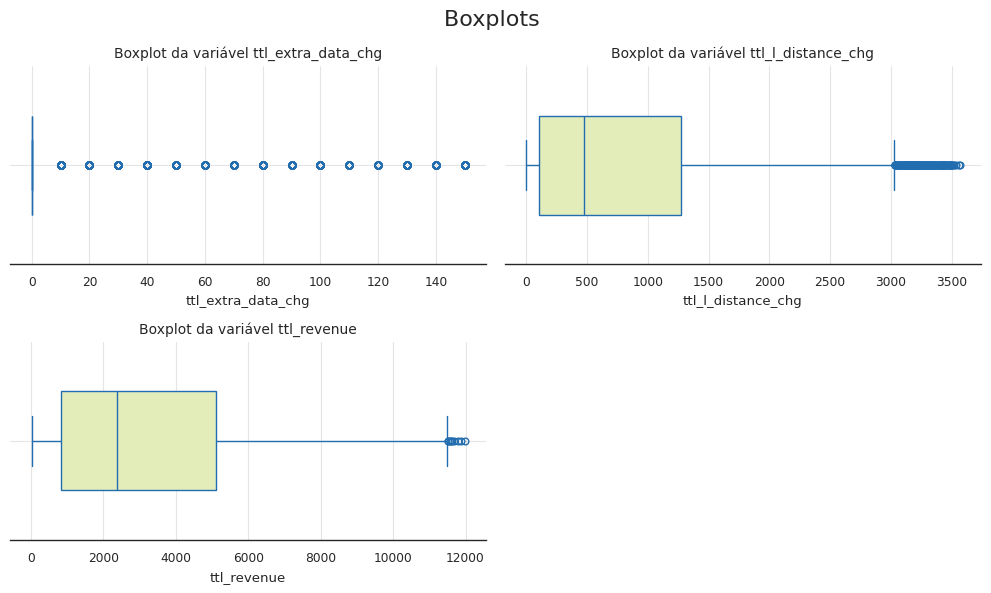

<Figure size 768x576 with 0 Axes>

In [100]:
VisualizationFunctions.outliers_plot(df_churn_filtered, num_features_4)

### Dropando outliers


In [101]:
outlier_columns = ['ttl_l_distance_chg', 'ttl_revenue', 'avg_monthly_gb_download', 'n_of_referrals']

In [102]:
def drop_outliers(df, colunas):

    def remover_outliers_coluna(coluna):
        Q1 = coluna.quantile(0.25)  # Primeiro quartil
        Q3 = coluna.quantile(0.75)  # Terceiro quartil
        IQR = Q3 - Q1               # Intervalo interquartil
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR
        return coluna[(coluna >= limite_inferior) & (coluna <= limite_superior)]

    # Aplica a remoção de outliers apenas nas colunas especificadas
    df[colunas] = df[colunas].apply(remover_outliers_coluna, axis=0)
    
    # Remove linhas com valores NaN criados pelos outliers eliminados
    return df.dropna(subset=colunas)

In [103]:
df_churn_filtered = drop_outliers(df_churn_filtered, outlier_columns)

In [104]:
df_churn_filtered.shape

(4925, 31)

### Dropando Features

In [105]:
df_churn_filtered = df_churn_filtered.drop(columns=drop_features)

## DF pre processado

In [106]:
df_churn_filtered.head()

,gender,age,married,n_of_dependents,n_of_referrals,tenure_in_months,offer,phone_service,multiple_lines,internet_service,...,streaming_music,unlimited_data,contract,paperless_billing,payment_method,ttl_refunds,ttl_extra_data_chg,ttl_l_distance_chg,ttl_revenue,customer_status
0,Female,37,Yes,0,2.0,9,No Offer,Yes,No,Yes,...,No,Yes,One Year,Yes,Credit Card,0.00,0,381.51,974.81,0
1,Male,46,No,0,0.0,9,No Offer,Yes,Yes,Yes,...,Yes,No,Month-to-Month,No,Credit Card,38.33,10,96.21,610.28,0
2,Male,50,No,0,0.0,4,Offer E,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.00,0,134.60,415.45,1
3,Male,78,Yes,0,1.0,13,Offer D,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Bank Withdrawal,0.00,0,361.66,1599.51,1
4,Female,75,Yes,0,3.0,3,No Offer,Yes,No,Yes,...,No,Yes,Month-to-Month,Yes,Credit Card,0.00,0,22.14,289.54,1


In [107]:
df_churn_filtered.to_csv('datasets/churn_pre_processed.csv', index=False)